In [20]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
iris_df = pd.DataFrame(iris['data'],
                       columns=iris['feature_names']
                      )
iris_df['target'] = iris['target']
X = iris_df.drop(columns=['target'])
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [4]:
for k in np.arange(2,6):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    iris_df['predicted'] = model.predict(scaled_X)
    display(
        f"with {k} clusters, the crosstab looks like:",
        pd.crosstab(iris_df['target'], iris_df['predicted'])
    )

'with 2 clusters, the crosstab looks like:'

predicted,0,1
target,,
0,50,0
1,0,50
2,0,50


'with 3 clusters, the crosstab looks like:'

predicted,0,1,2
target,,,
0,0,50,0
1,11,0,39
2,36,0,14


'with 4 clusters, the crosstab looks like:'

predicted,0,1,2,3
target,,,,
0,22,0,0,28
1,0,11,39,0
2,0,36,14,0


'with 5 clusters, the crosstab looks like:'

predicted,0,1,2,3,4
target,,,,,
0,0,25,25,0,0
1,2,0,0,21,27
2,27,0,0,2,21


There seems to be some overlap in the targets 1 & 2 and kmeans is unable to segregate the two clusters based on the number of available features, regardless of the K-value we use.  Where K=5 is where we see the highest segregation between the model and the actual target variables. with some overlap in one of the clusters.  This would likely be the model used for classifying the iris data even though we know that there are only 3 classifications

In [10]:
confile = list(pd.read_csv('../../dbcon.csv'))
postgres_db = 'heartdisease'
db_connection = 'postgresql://{}:{}@{}:{}/{}'.format(confile[0], confile[1], confile[2], confile[3], postgres_db)

query = '''
SELECT *
FROM heartdisease
;'''

heartdisease_df = pd.read_sql(query, db_connection)

In [12]:
X = heartdisease_df.iloc[:, :13]
y = heartdisease_df.iloc[:, 13]

X = X.replace(to_replace='?', value=0)
y = np.where(y > 0, 0, 1)

scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [18]:
for k in np.arange(1,3):
    model = KMeans(n_clusters=k)
    model.fit(scaled_X)
    heartdisease_df['predicted'] = model.predict(scaled_X)
    display(
        f"with {k} clusters, the crosstab looks like:",
        pd.crosstab(y, heartdisease_df['predicted'])
    )

'with 1 clusters, the crosstab looks like:'

predicted,0
row_0,
0,139
1,164


'with 2 clusters, the crosstab looks like:'

predicted,0,1
row_0,,
0,38,101
1,151,13


There seems to be some overlap in the targets and kmeans is unable to segregate the two clusters based on the number of available features, regardless of the K-value we use.  K=2 still gives the best output

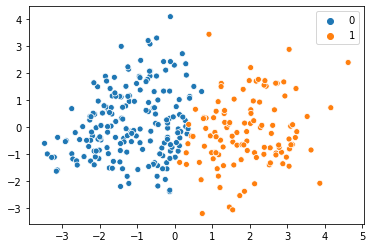

In [28]:
pca_mod = PCA(n_components=2)
pca_X = pca_mod.fit_transform(scaled_X)
sns.scatterplot(pca_X[:,0], pca_X[:,1], hue=model.labels_)


In [31]:
pca_mod.explained_variance_ratio_

array([0.23630818, 0.12281689])